In [4]:
import pandas as pd #modules
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import os
import pathlib
from pathlib import Path
from datetime import datetime

In [1]:
import os

def find_reports_in_onedrive():
    """
    Scans the subfolders under the current user's OneDrive folder (including variations like 'OneDrive - Company Name')
    and returns the paths of all folders with the prefix 'reports'.

    Returns:
        list: A list of full paths to folders starting with 'reports', or an empty list if none are found.
    """
    # Get the base path to the user's home directory
    user_home = os.path.expanduser("~")

    # Find the OneDrive folder (handles variations like "OneDrive - Company Name")
    onedrive_folder = None
    for folder in os.listdir(user_home):
        if folder.startswith("OneDrive -"):
            onedrive_folder = os.path.join(user_home, folder)
            break

    if not onedrive_folder:
        raise FileNotFoundError("OneDrive folder not found for the current user.")

    # Search for folders with the prefix 'reports' in the OneDrive directory
    report_folders = []
    for root, dirs, files in os.walk(onedrive_folder):
        for dir_name in dirs:
            if dir_name.lower().startswith("reports"):
                report_folders.append(os.path.join(root, dir_name))

    return report_folders

In [2]:
reports_paths=find_reports_in_onedrive()
reports_paths

['C:\\Users\\jdbustamante\\OneDrive - Duratex SA\\reports_cuchillas',
 'C:\\Users\\jdbustamante\\OneDrive - Duratex SA\\reports_eventos',
 'C:\\Users\\jdbustamante\\OneDrive - Duratex SA\\reports_humidity_measures',
 'C:\\Users\\jdbustamante\\OneDrive - Duratex SA\\reports_ops_pendings',
 'C:\\Users\\jdbustamante\\OneDrive - Duratex SA\\reports_pre-usos_diligenciamiento_no_cumple',
 'C:\\Users\\jdbustamante\\OneDrive - Duratex SA\\reports_quality_deviations',
 'C:\\Users\\jdbustamante\\OneDrive - Duratex SA\\reports_visualizacion_data_produccion',
 'C:\\Users\\jdbustamante\\OneDrive - Duratex SA\\control_room\\reports_causa_rechazos']

In [5]:
str_folder_searcher="reports_visualizacion_data_produccion"
for report_path in reports_paths:
    if str_folder_searcher in report_path:
        path=Path(reports_paths[reports_paths.index(report_path)])
path=Path.joinpath(path,r"source_and_return_data")
path

WindowsPath('C:/Users/jdbustamante/OneDrive - Duratex SA/reports_visualizacion_data_produccion/source_and_return_data')

In [6]:
os.chdir(path) #change working directory to respective reports folder
os.getcwd()

'C:\\Users\\jdbustamante\\OneDrive - Duratex SA\\reports_visualizacion_data_produccion\\source_and_return_data'

In [7]:
directory = Path.joinpath(path,"data_plots") #get current work directory
directory.mkdir(exist_ok=True)
matching_files = list(directory.glob("*obj*.xlsx"))  # Busca archivos que contengan 'obj' y tengan extensión .xlsx
print("Archivos encontrados:", matching_files)

Archivos encontrados: [WindowsPath('C:/Users/jdbustamante/OneDrive - Duratex SA/reports_visualizacion_data_produccion/source_and_return_data/data_plots/test_obj_aperturas_nariz.xlsx'), WindowsPath('C:/Users/jdbustamante/OneDrive - Duratex SA/reports_visualizacion_data_produccion/source_and_return_data/data_plots/test_obj_causa_rechazos.xlsx')]


In [8]:
dict_data_pointer={} #dict to store files as dfs
for i in matching_files: # Read the Excel file 
    file_path = str(i)  # Update this with the path
    df = pd.read_excel(file_path)
    print(file_path)
    df_name=file_path.split("obj_")[1].split(".")[0] #split str with "obj_" and the  "." char and take the file name
    date_col="Fecha" #default col name with dates
    if "aperturas" in file_path.lower(): #if excel name file contains "aperturas", change col name with dates
        date_col="Fecha Paro"
    row_numbers_nan = df.index[df[date_col].isna()].tolist() # Get the row numbers where 'Fecha' or 'Fecha Paro' is NaN
    row_numbers = list(set(row_numbers_nan)) # lists of row with nan numbers
    filtered_df = df.drop(index=row_numbers) # Filter the DataFrame to keep only the rows that are not in row_numbers
    dict_data_pointer[f"{df_name}"]=filtered_df #store filtered df in dictionary data pointer
print(list(dict_data_pointer.keys())) #see keys on dictionary to check callability

C:\Users\jdbustamante\OneDrive - Duratex SA\reports_visualizacion_data_produccion\source_and_return_data\data_plots\test_obj_aperturas_nariz.xlsx
C:\Users\jdbustamante\OneDrive - Duratex SA\reports_visualizacion_data_produccion\source_and_return_data\data_plots\test_obj_causa_rechazos.xlsx
['aperturas_nariz', 'causa_rechazos']


In [9]:
df_root=dict_data_pointer['aperturas_nariz']
df_root[df_root["Fecha Paro"]=="NaT"]

,Linea,Proceso,Tipo Paro,Fecha Paro,Hora Inicial,Hora Final,Descripción Equipo,Modo de Fallo,Obversación,Tiempo Parada,Turno,Calibre,Columna1


In [10]:
df_root

,Linea,Proceso,Tipo Paro,Fecha Paro,Hora Inicial,Hora Final,Descripción Equipo,Modo de Fallo,Obversación,Tiempo Parada,Turno,Calibre,Columna1
0,CRUDO,500 - PRENSA,PARO PROGRAMADO,2025-01-01,21:00:00,05:00:00,ALTO NIVEL DE INVENTARIO - PGR,ALTO NIVEL DE INVENTARIO - PGR,Paro programado de planta,480,3,NaN,NaN
1,CRUDO,500 - PRENSA,PARO PROGRAMADO,2025-01-01,05:00:00,13:00:00,ALTO NIVEL DE INVENTARIO - PGR,ALTO NIVEL DE INVENTARIO - PGR,Paro programado de planta,480,1,NaN,NaN
2,CRUDO,500 - PRENSA,PARO PROGRAMADO,2025-01-01,13:00:00,21:00:00,ALTO NIVEL DE INVENTARIO - PGR,ALTO NIVEL DE INVENTARIO - PGR,Paro programado de planta,480,2,NaN,NaN
3,CRUDO,500 - PRENSA,PARO PROGRAMADO,2025-01-02,21:00:00,19:46:00,500 PRENSA DIEFFENBACHER,MTTO GENERAL - PGR,Arranque de línea de crudo. Se corrigen condic...,406,3,11 TAPAS,152426
4,CRUDO,"400 - FORMACION, PRE-PRENSADO & CORTE",PRODUCCIÓN,2025-01-02,20:02:00,20:09:00,400 FORMACION Y PREPRENSA,VARIACION HUMEDAD - PRO,Se abrea nariz y se evacúa la fibra,6,3,11 TAPAS,152426
...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,CRUDO,"400 - FORMACION, PRE-PRENSADO & CORTE",PCP,2025-01-14,12:03:00,13:00:00,400 FORMACION Y PREPRENSA,CAMBIO DE CALIBRE - PCP,Se inicia paso de fibra y formación para prens...,57,2,11 TAPAS,152822
128,CRUDO,"400 - FORMACION, PRE-PRENSADO & CORTE",PRODUCCIÓN,2025-01-14,13:00:00,13:15:00,400.406 SCALPER (RASURADOR),ATASCO MATERIAL - PRO,Se recibe turno con ese paro por atasco en el...,15,3,25,152927
129,CRUDO,"400 - FORMACION, PRE-PRENSADO & CORTE",PCP,2025-01-14,14:15:00,15:00:00,400 FORMACION Y PREPRENSA,CAMBIO DE CALIBRE - PCP,Cambio de 25MM a 3MM,45,3,3,NaN
130,CRUDO,"400 - FORMACION, PRE-PRENSADO & CORTE",PCP,2025-01-14,15:38:00,15:58:00,400 FORMACION Y PREPRENSA,CAMBIO DE CALIBRE - PCP,Cambio de calibre 3 mm a 4 mm,20,3,4,152871


In [13]:
df_pro=df_root[df_root["Tipo Paro"].str.contains("PRO")]
#df_pro.set_index([pd.Index(range(len(df_pro)))],inplace=True)
df_pro["Fecha Paro"]=df_pro.loc[:,"Fecha Paro"].apply(lambda x: x.strftime("%Y-%m-%d")) #
df_pro['Fecha Paro'][0]

C:\Users\jdbustamante\AppData\Local\Temp\ipykernel_3240\787380065.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pro["Fecha Paro"]=df_pro.loc[:,"Fecha Paro"].apply(lambda x: x.strftime("%Y-%m-%d")) #


'2025-01-01'

# Drop duplicate apertures

In [14]:
dates_ar=[date for date in df_pro["Fecha Paro"].unique()]
dates_ar

['2025-01-01',
 '2025-01-02',
 '2025-01-03',
 '2025-01-04',
 '2025-01-05',
 '2025-01-06',
 '2025-01-07',
 '2025-01-08',
 '2025-01-10',
 '2025-01-11',
 '2025-01-12',
 '2025-01-13',
 '2025-01-14']

In [15]:
list_dropped_idx_rows=[]
for date_ar in dates_ar:
    print(date_ar)
    df_seeker=df_pro.loc[df_pro["Fecha Paro"]==date_ar] #filter by date
    rows_df_seeker=df_seeker.index #get idx of df for current date
    last_row=rows_df_seeker[-1] #to avoid out of range
    print(last_row)
    for idx,row in enumerate(rows_df_seeker):
        print(f"{row} from {len(rows_df_seeker)}")
        if row==last_row:
            continue #jump to next date
        if df_seeker.at[row,"Hora Final"]==df_seeker.at[rows_df_seeker[idx+1],"Hora Inicial"]:
            list_dropped_idx_rows.append(row+1) #add idx to be dropped
    print("idxs to drop are {}".format(list_dropped_idx_rows))
df_pro.drop(list_dropped_idx_rows,inplace=True) #drop selected rows for current date
df_pro

2025-01-01
2
0 from 3
1 from 3
2 from 3
idxs to drop are [1, 2]
2025-01-02
6
3 from 4
4 from 4
5 from 4
6 from 4
idxs to drop are [1, 2, 5]
2025-01-03
20
7 from 8
8 from 8
9 from 8
10 from 8
11 from 8
12 from 8
16 from 8
20 from 8
idxs to drop are [1, 2, 5, 12]
2025-01-04
23
22 from 2
23 from 2
idxs to drop are [1, 2, 5, 12]
2025-01-05
28
25 from 4
26 from 4
27 from 4
28 from 4
idxs to drop are [1, 2, 5, 12]
2025-01-06
38
30 from 7
32 from 7
34 from 7
35 from 7
36 from 7
37 from 7
38 from 7
idxs to drop are [1, 2, 5, 12, 35]
2025-01-07
57
42 from 14
43 from 14
44 from 14
45 from 14
46 from 14
49 from 14
50 from 14
51 from 14
52 from 14
53 from 14
54 from 14
55 from 14
56 from 14
57 from 14
idxs to drop are [1, 2, 5, 12, 35, 44, 50, 51, 56]
2025-01-08
64
58 from 5
61 from 5
62 from 5
63 from 5
64 from 5
idxs to drop are [1, 2, 5, 12, 35, 44, 50, 51, 56, 62]
2025-01-10
86
68 from 7
69 from 7
75 from 7
76 from 7
80 from 7
81 from 7
86 from 7
idxs to drop are [1, 2, 5, 12, 35, 44, 50, 51, 

C:\Users\jdbustamante\AppData\Local\Temp\ipykernel_3240\3455869565.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pro.drop(list_dropped_idx_rows,inplace=True) #drop selected rows for current date


,Linea,Proceso,Tipo Paro,Fecha Paro,Hora Inicial,Hora Final,Descripción Equipo,Modo de Fallo,Obversación,Tiempo Parada,Turno,Calibre,Columna1
0,CRUDO,500 - PRENSA,PARO PROGRAMADO,2025-01-01,21:00:00,05:00:00,ALTO NIVEL DE INVENTARIO - PGR,ALTO NIVEL DE INVENTARIO - PGR,Paro programado de planta,480,3,NaN,NaN
3,CRUDO,500 - PRENSA,PARO PROGRAMADO,2025-01-02,21:00:00,19:46:00,500 PRENSA DIEFFENBACHER,MTTO GENERAL - PGR,Arranque de línea de crudo. Se corrigen condic...,406,3,11 TAPAS,152426
4,CRUDO,"400 - FORMACION, PRE-PRENSADO & CORTE",PRODUCCIÓN,2025-01-02,20:02:00,20:09:00,400 FORMACION Y PREPRENSA,VARIACION HUMEDAD - PRO,Se abrea nariz y se evacúa la fibra,6,3,11 TAPAS,152426
6,CRUDO,"600 - CORTE, ENFRIAMIENTO & APILADO",PRODUCCIÓN,2025-01-02,20:15:00,20:31:00,600.631 SIERRA DIAGONAL,TABLERO EXPLOTADO - PRO,Se pierdesecuencia en la sierra diagonal debid...,16,3,11 TAPAS,152426
7,CRUDO,500 - PRENSA,PRODUCCIÓN,2025-01-03,21:05:00,21:16:00,500 PRENSA DIEFFENBACHER,SENSOR OBSTRUIDO - PRO,Sensor de cadena lado de operación de la cadena,11,1,9,152433
...,...,...,...,...,...,...,...,...,...,...,...,...,...
108,CRUDO,500 - PRENSA,PRODUCCIÓN,2025-01-13,10:18:00,10:22:00,PERDIDA DE SECUENCIA - ELC,PERDIDA DE SECUENCIA - ELC,Se presenta paro de prensa por perdida de tens...,4,2,9,152687
109,CRUDO,500 - PRENSA,PRODUCCIÓN,2025-01-13,10:39:00,10:42:00,ACCIONAMIENTO SISTEMA SEGURIDAD - PRO,ACCIONAMIENTO SISTEMA SEGURIDAD - PRO,se activa sensor doble manta y nos detiene la ...,3,2,9,152687
116,CRUDO,100 - ALIMENTACION & CLASIFICACION ASTILLA,PRODUCCIÓN,2025-01-13,17:52:00,18:09:00,FALTA DE MATERIA PRIMA - PRO,FALTA DE MATERIA PRIMA - PRO,Se pierde nivel de la prestiming bind debido a...,17,3,9,152687
121,CRUDO,"400 - FORMACION, PRE-PRENSADO & CORTE",PRODUCCIÓN,2025-01-14,08:52:00,09:49:00,400 FORMACION Y PREPRENSA,LIMPIEZA DE EQUIPOS - PRO,Se ejecuta protocolo de limpieza de linea de f...,57,2,11 TAPAS,152822


In [16]:
df_count_fail_mode_equipment=df_pro.groupby(by=["Fecha Paro","Modo de Fallo","Descripción Equipo"]).count().loc[:,"Linea"]
df_count_fail_mode_equipment

Fecha Paro  Modo de Fallo                          Descripción Equipo                            
2025-01-01  ALTO NIVEL DE INVENTARIO - PGR         ALTO NIVEL DE INVENTARIO - PGR                    1
2025-01-02  MTTO  GENERAL - PGR                    500 PRENSA DIEFFENBACHER                          1
            TABLERO EXPLOTADO - PRO                600.631 SIERRA DIAGONAL                           1
            VARIACION HUMEDAD - PRO                400 FORMACION Y PREPRENSA                         1
2025-01-03  DETECCIÓN DE METAL - PRO               110.111 DETECTOR DE METALES ANTES DEL REFINO      1
                                                   400.412 DETECTOR DE METALES BANDA DE FORMACION    1
            SENSOR OBSTRUIDO - PRO                 500 PRENSA DIEFFENBACHER                          3
            VARIACION HUMEDAD - PRO                300 SECADO PRIMERA Y SEGUNDA ETAPA                2
2025-01-04  LIMPIEZA FILTRO - PRO                  250.268 BOMBA DOSIFICACION 

In [17]:
multi_index_from_df=list(df_count_fail_mode_equipment.index)
multi_index_from_df

[('2025-01-01',
  'ALTO NIVEL DE INVENTARIO - PGR',
  'ALTO NIVEL DE INVENTARIO - PGR'),
 ('2025-01-02', 'MTTO  GENERAL - PGR', '500 PRENSA DIEFFENBACHER'),
 ('2025-01-02', 'TABLERO EXPLOTADO - PRO', '600.631 SIERRA DIAGONAL'),
 ('2025-01-02', 'VARIACION HUMEDAD - PRO', '400 FORMACION Y PREPRENSA'),
 ('2025-01-03',
  'DETECCIÓN DE METAL - PRO',
  '110.111 DETECTOR DE METALES ANTES DEL REFINO'),
 ('2025-01-03',
  'DETECCIÓN DE METAL - PRO',
  '400.412 DETECTOR DE METALES BANDA DE FORMACION'),
 ('2025-01-03', 'SENSOR OBSTRUIDO - PRO', '500 PRENSA DIEFFENBACHER'),
 ('2025-01-03',
  'VARIACION HUMEDAD - PRO',
  '300 SECADO PRIMERA Y SEGUNDA ETAPA'),
 ('2025-01-04', 'LIMPIEZA FILTRO - PRO', '250.268 BOMBA DOSIFICACION DE AGUA'),
 ('2025-01-04', 'SENSOR OBSTRUIDO - PRO', '600.616 CARRO DE TRANSFERENCIA'),
 ('2025-01-05', 'SENSOR OBSTRUIDO - PRO', '500 PRENSA DIEFFENBACHER'),
 ('2025-01-06',
  'ACCIONAMIENTO SISTEMA SEGURIDAD - PRO',
  '500 PRENSA DIEFFENBACHER'),
 ('2025-01-06', 'AJUSTE PARA

In [18]:
dates=sorted(list(set([multi_index[0] for multi_index in multi_index_from_df ])))
dates

['2025-01-01',
 '2025-01-02',
 '2025-01-03',
 '2025-01-04',
 '2025-01-05',
 '2025-01-06',
 '2025-01-07',
 '2025-01-08',
 '2025-01-10',
 '2025-01-11',
 '2025-01-12',
 '2025-01-13',
 '2025-01-14']

In [19]:
fail_modes=sorted(list(set([multi_index[1] for multi_index in multi_index_from_df ])))
fail_modes

['ACCIONAMIENTO SISTEMA SEGURIDAD - PRO',
 'AJUSTE DE POSICION - PRO',
 'AJUSTE PARAMETROS - PRO',
 'ALTO NIVEL DE INVENTARIO - PGR',
 'ATASCO MATERIAL - PRO',
 'DETECCIÓN DE METAL - PRO',
 'FALTA DE MATERIA PRIMA - PRO',
 'LIMPIEZA DE EQUIPOS - PRO',
 'LIMPIEZA FILTRO - PRO',
 'MTTO  GENERAL - PGR',
 'PERDIDA DE SECUENCIA - ELC',
 'SENSOR OBSTRUIDO - PRO',
 'TABLERO EXPLOTADO - PRO',
 'VARIACION FLUJO - PRO',
 'VARIACION HUMEDAD - PRO',
 'VARIACION NIVEL - PRO',
 'VARIACION TEMPERATURA - PRO']

In [20]:
equipments=sorted(list(set([multi_index[2] for multi_index in multi_index_from_df ])))
equipments

['100.118 ELEVADOR DE CANGILONES',
 '110.111 DETECTOR DE METALES ANTES DEL REFINO',
 '200.227 TORNILLO ESTRUJADOR',
 '200.232 REFINADOR',
 '200.232.GS14 SENSOR POSICION DE DISCOS',
 '250.268 BOMBA DOSIFICACION DE AGUA',
 '300 SECADO PRIMERA Y SEGUNDA ETAPA',
 '400 FORMACION Y PREPRENSA',
 '400.403.05 DESMENUZADOR #5 BUNKER',
 '400.406 SCALPER (RASURADOR)',
 '400.412 DETECTOR DE METALES BANDA DE FORMACION',
 '400.415 BANDA DE FORMACION',
 '500 PRENSA DIEFFENBACHER',
 '600.610 STACKER',
 '600.614 APILADOR DE CALIBRES BAJOS (STACKING)',
 '600.616 CARRO DE TRANSFERENCIA',
 '600.631 SIERRA DIAGONAL',
 '800.809 SIFTER',
 '856.01 PLC VYNCKE',
 'ACCIONAMIENTO SISTEMA SEGURIDAD - PRO',
 'ALTO NIVEL DE INVENTARIO - PGR',
 'FALTA DE MATERIA PRIMA - PRO',
 'PERDIDA DE SECUENCIA - ELC',
 'VARIACION NIVEL - PRO']

In [21]:
df_stacked_data=pd.DataFrame(data=[],index=dates,columns=fail_modes).fillna(0)
df_stacked_data

C:\Users\jdbustamante\AppData\Local\Temp\ipykernel_3240\558380705.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_stacked_data=pd.DataFrame(data=[],index=dates,columns=fail_modes).fillna(0)


,ACCIONAMIENTO SISTEMA SEGURIDAD - PRO,AJUSTE DE POSICION - PRO,AJUSTE PARAMETROS - PRO,ALTO NIVEL DE INVENTARIO - PGR,ATASCO MATERIAL - PRO,DETECCIÓN DE METAL - PRO,FALTA DE MATERIA PRIMA - PRO,LIMPIEZA DE EQUIPOS - PRO,LIMPIEZA FILTRO - PRO,MTTO GENERAL - PGR,PERDIDA DE SECUENCIA - ELC,SENSOR OBSTRUIDO - PRO,TABLERO EXPLOTADO - PRO,VARIACION FLUJO - PRO,VARIACION HUMEDAD - PRO,VARIACION NIVEL - PRO,VARIACION TEMPERATURA - PRO
2025-01-01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2025-01-02,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2025-01-03,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2025-01-04,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2025-01-05,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2025-01-06,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2025-01-07,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2025-01-08,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2025-01-10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2025-01-11,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [22]:
dict_stacked_values={fail_mode:[""]*len(dates) for fail_mode in fail_modes}
for date,fail_mode,equip in multi_index_from_df:
    print(date,fail_mode)
    count_by_date_by_fail_mode_by_equipment= df_count_fail_mode_equipment[date,fail_mode].sum() # df_count_fail_mode_equipment.at[date,fail_mode,equip]
    print(count_by_date_by_fail_mode_by_equipment)
    value_label_plus_equip=str(count_by_date_by_fail_mode_by_equipment) # equip.split(" ")[0]+":"+
    print(value_label_plus_equip)
    df_stacked_data.loc[date,fail_mode]=count_by_date_by_fail_mode_by_equipment
    idx_date=dates.index(date)
    dict_stacked_values[fail_mode][idx_date]=value_label_plus_equip

2025-01-01 ALTO NIVEL DE INVENTARIO - PGR
1
1
2025-01-02 MTTO  GENERAL - PGR
1
1
2025-01-02 TABLERO EXPLOTADO - PRO
1
1
2025-01-02 VARIACION HUMEDAD - PRO
1
1
2025-01-03 DETECCIÓN DE METAL - PRO
2
2
2025-01-03 DETECCIÓN DE METAL - PRO
2
2
2025-01-03 SENSOR OBSTRUIDO - PRO
3
3
2025-01-03 VARIACION HUMEDAD - PRO
2
2
2025-01-04 LIMPIEZA FILTRO - PRO
1
1
2025-01-04 SENSOR OBSTRUIDO - PRO
1
1
2025-01-05 SENSOR OBSTRUIDO - PRO
4
4
2025-01-06 ACCIONAMIENTO SISTEMA SEGURIDAD - PRO
2
2
2025-01-06 AJUSTE PARAMETROS - PRO
1
1
2025-01-06 DETECCIÓN DE METAL - PRO
3
3
2025-01-06 DETECCIÓN DE METAL - PRO
3
3
2025-01-07 AJUSTE PARAMETROS - PRO
1
1
2025-01-07 ATASCO MATERIAL - PRO
8
8
2025-01-07 ATASCO MATERIAL - PRO
8
8
2025-01-07 ATASCO MATERIAL - PRO
8
8
2025-01-07 ATASCO MATERIAL - PRO
8
8
2025-01-07 VARIACION FLUJO - PRO
1
1
2025-01-08 ATASCO MATERIAL - PRO
2
2
2025-01-08 ATASCO MATERIAL - PRO
2
2
2025-01-08 DETECCIÓN DE METAL - PRO
1
1
2025-01-08 VARIACION FLUJO - PRO
1
1
2025-01-10 AJUSTE DE POS

In [23]:
df_stacked_data

,ACCIONAMIENTO SISTEMA SEGURIDAD - PRO,AJUSTE DE POSICION - PRO,AJUSTE PARAMETROS - PRO,ALTO NIVEL DE INVENTARIO - PGR,ATASCO MATERIAL - PRO,DETECCIÓN DE METAL - PRO,FALTA DE MATERIA PRIMA - PRO,LIMPIEZA DE EQUIPOS - PRO,LIMPIEZA FILTRO - PRO,MTTO GENERAL - PGR,PERDIDA DE SECUENCIA - ELC,SENSOR OBSTRUIDO - PRO,TABLERO EXPLOTADO - PRO,VARIACION FLUJO - PRO,VARIACION HUMEDAD - PRO,VARIACION NIVEL - PRO,VARIACION TEMPERATURA - PRO
2025-01-01,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2025-01-02,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0
2025-01-03,0,0,0,0,0,2,0,0,0,0,0,3,0,0,2,0,0
2025-01-04,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
2025-01-05,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0
2025-01-06,2,0,1,0,0,3,0,0,0,0,0,0,0,0,0,0,0
2025-01-07,0,0,1,0,8,0,0,0,0,0,0,0,0,1,0,0,0
2025-01-08,0,0,0,0,2,1,0,0,0,0,0,0,0,1,0,0,0
2025-01-10,0,1,0,0,1,0,0,0,0,0,0,0,5,0,0,0,0
2025-01-11,0,0,0,0,0,4,0,0,0,0,0,2,3,0,0,0,1


In [24]:
list_count_by_fail_mode_per_date=list(df_stacked_data.T.values)
weight_counts={" ".join(fail_mode.split("-")[0].split()).lower():list_count_by_fail_mode_per_date[idx] for idx,fail_mode in enumerate(fail_modes)}
weight_counts

{'accionamiento sistema seguridad': array([0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 2, 0]),
 'ajuste de posicion': array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]),
 'ajuste parametros': array([0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0]),
 'alto nivel de inventario': array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 'atasco material': array([0, 0, 0, 0, 0, 0, 8, 2, 1, 0, 1, 0, 1]),
 'detección de metal': array([0, 0, 2, 0, 0, 3, 0, 1, 0, 4, 0, 0, 0]),
 'falta de materia prima': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]),
 'limpieza de equipos': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]),
 'limpieza filtro': array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 'mtto general': array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 'perdida de secuencia': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]),
 'sensor obstruido': array([0, 0, 3, 1, 4, 0, 0, 0, 0, 2, 0, 0, 0]),
 'tablero explotado': array([0, 1, 0, 0, 0, 0, 0, 0, 5, 3, 0, 0, 0]),
 'variacion flujo': array([0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0]),

In [25]:
for new_key,old_key in zip(weight_counts.keys(),fail_modes):
    dict_stacked_values[new_key] = dict_stacked_values.pop(old_key)
dict_stacked_values

{'accionamiento sistema seguridad': ['',
  '',
  '',
  '',
  '',
  '2',
  '',
  '',
  '',
  '',
  '1',
  '2',
  ''],
 'ajuste de posicion': ['', '', '', '', '', '', '', '', '1', '', '', '', ''],
 'ajuste parametros': ['', '', '', '', '', '1', '1', '', '', '', '', '', ''],
 'alto nivel de inventario': ['1',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  ''],
 'atasco material': ['', '', '', '', '', '', '8', '2', '1', '', '1', '', '1'],
 'detección de metal': ['',
  '',
  '2',
  '',
  '',
  '3',
  '',
  '1',
  '',
  '4',
  '',
  '',
  ''],
 'falta de materia prima': ['',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '1',
  ''],
 'limpieza de equipos': ['', '', '', '', '', '', '', '', '', '', '', '', '1'],
 'limpieza filtro': ['', '', '', '1', '', '', '', '', '', '', '', '', ''],
 'mtto general': ['', '1', '', '', '', '', '', '', '', '', '', '', ''],
 'perdida de secuencia': ['', '', '', '', '', '', '', '', '', '', '', '1', ''],
 'sensor obstruido': ['

# Plot

In [26]:
colors_available=mcolors.TABLEAU_COLORS
colors_available

{'tab:blue': '#1f77b4',
 'tab:orange': '#ff7f0e',
 'tab:green': '#2ca02c',
 'tab:red': '#d62728',
 'tab:purple': '#9467bd',
 'tab:brown': '#8c564b',
 'tab:pink': '#e377c2',
 'tab:gray': '#7f7f7f',
 'tab:olive': '#bcbd22',
 'tab:cyan': '#17becf'}

In [27]:
"""
colors_choosen={color: colors_available[color] for color in list(colors_available)[:len(weight_count_causes)]}
colors_choosen
"""

'\ncolors_choosen={color: colors_available[color] for color in list(colors_available)[:len(weight_count_causes)]}\ncolors_choosen\n'

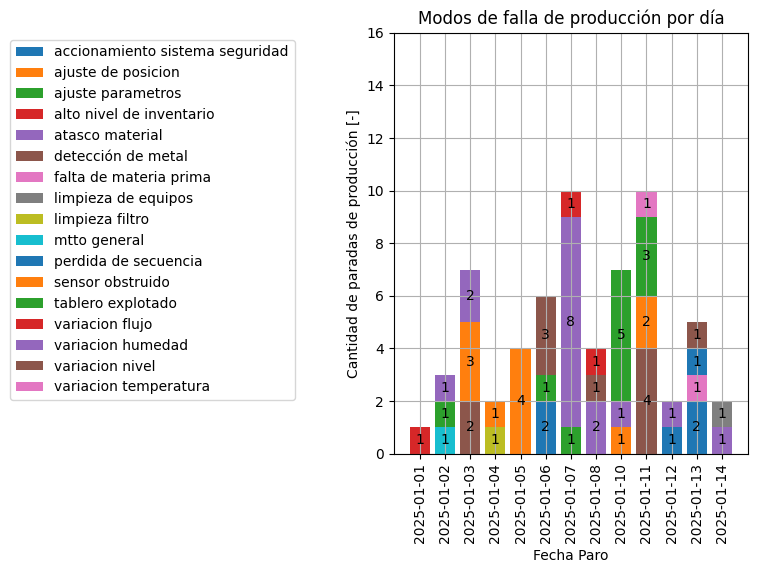

In [30]:
fig, ax = plt.subplots()
fig.tight_layout()  # Adjust layout to prevent clipping of labels
#fig.set_figheight(8)
fig.set_figwidth(4)
#fig.set_size_inches(50, 40) #set plot size
#plot aperturas
amt_dates=len(dates)
bottom = np.zeros(amt_dates) #initial axis for stacked bars plotting
plt.grid() #make grid mesh
max_bottom=0 #to store max of bottoms in construction of bar
for (data_label,weight_count),bar_value_stick in zip(weight_counts.items(),dict_stacked_values.values()): # ,colors_choosen run through dates, rejected per cause per dates, labels of values of rejected per cause per day 
    p = ax.bar(dates, weight_count,label=data_label,bottom=bottom) # ,color=color_cause take bar plot elements: rectangle(attribute 1, attribute 2, ...)
    bottom += weight_count #make new start to plot next top rectangle
    check_bottom=np.max(bottom)
    if check_bottom>max_bottom:
        max_bottom=check_bottom #to generate ylim of causas rechazos
    ax.bar_label(p,labels=bar_value_stick,label_type='center',color="black") #   add bar height str value on bar center
leq=ax.legend(loc="best") #generate legend box for bar plot
# Get the bounding box of the original legend
bb = leq.get_bbox_to_anchor().transformed(ax.transAxes.inverted()) 
# Change to location of the legend. 
xOffset = -1.2
bb.x0 += xOffset
bb.x1 += xOffset*(1.05)
leq.set_bbox_to_anchor(bb, transform = ax.transAxes)
amt_xticks=range(len(dates))
ax.set_xticks(amt_xticks)
ax.set_xticklabels(dates,rotation=90) #rotate x axis labels 90º to be displayed vertically
ax.set_xlabel("Fecha Paro") #name of bar plot x axis
amt_stops_per_fail_mode=np.array(list(weight_counts.values()))
max_y_axis=np.max(amt_stops_per_fail_mode) #get max of all data
ax.set_yticks(np.arange(0, max_y_axis+max_bottom, 2)) #set y axis label values: axis pitch=10 unds
ax.set_ylabel("Cantidad de paradas de producción [-]") #y axis name for bar plot
ax.set_aspect('auto')
imgs_folder="/imgs_reports_daily" #str with name to save plots
imgs_type_folder="/fail_modes_equipments"
imgs_year_folder=f"/year_{dates[0].split("-")[0]}"
imgs_month_folder=f"/month_{dates[0].split("-")[1]}"
img_name="/fail_modes_PRO_per_Type" #name of img file
str_today=datetime.today().strftime('%Y-%m-%d') #asign date of generation
plt.title("Modos de falla de producción por día") #make title
directory_to_save = Path(str(directory)+imgs_folder+imgs_type_folder+imgs_year_folder+imgs_month_folder) # get directory to save plot
directory_to_save.mkdir(exist_ok=True)
plt.savefig(str(directory_to_save)+img_name+dates[0]+"_"+dates[-1]+"_"+str_today+".png", bbox_inches='tight') #store img plot
plt.show()

# Export notebook to make .py script

In [29]:
!jupyter nbconvert --to script bar_plot_fail_modes_PRO_per_day.ipynb

This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True]
--execute
    Execute the notebook prior to export.
    Equivalent to: [--ExecutePr

[NbConvertApp] WARNING | pattern 'bar_plot_fail_modes_PRO_per_day.ipynb' matched no files



--log-level=<Enum>
    Set the log level by value or name.
    Choices: any of [0, 10, 20, 30, 40, 50, 'DEBUG', 'INFO', 'WARN', 'ERROR', 'CRITICAL']
    Default: 30
    Equivalent to: [--Application.log_level]
--config=<Unicode>
    Full path of a config file.
    Default: ''
    Equivalent to: [--JupyterApp.config_file]
--to=<Unicode>
    The export format to be used, either one of the built-in formats
            ['asciidoc', 'custom', 'html', 'latex', 'markdown', 'notebook', 'pdf', 'python', 'qtpdf', 'qtpng', 'rst', 'script', 'slides', 'webpdf']
            or a dotted object name that represents the import path for an
            ``Exporter`` class
    Default: ''
    Equivalent to: [--NbConvertApp.export_format]
--template=<Unicode>
    Name of the template to use
    Default: ''
    Equivalent to: [--TemplateExporter.template_name]
--template-file=<Unicode>
    Name of the template file to use
    Default: None
    Equivalent to: [--TemplateExporter.template_file]
--theme=<Unico